### Student Information
Name: 戴迪生

Student ID: 113351037 (NCCU)

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import plotly as py
import math
import helpers.data_mining_helpers as dmh

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/daidisheng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Data introduction &  Data cleansing

In [2]:
### Begin Assignment Here
reddit_s = pd.read_csv('/Users/daidisheng/Desktop/研究所/資料探勘/DM2025-Lab1-Exercise-main/newdataset/Reddit-stock-sentiment.csv')
reddit_s

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


##### Quering Date (HW2)

In [3]:
reddit_s1 = reddit_s.copy(deep=True)
reddit_s1_1 = reddit_s1[['subreddit', 'sentiment']]

##### Joining strings (HW1)

In [4]:
#. combining title and text, because they are the same thing in sentiment analysis
x = []
for i in range(847):
    x.append(" ".join((reddit_s1.title[i] + "\n "+ reddit_s1.text[i]).split(' ')))
    
X = pd.DataFrame({'text': x})

In [5]:
reddit_s1_1 = pd.concat([reddit_s1_1, X], axis =1)

##### Automating Ylim (HW7)

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit source'}, xlabel='subreddit'>

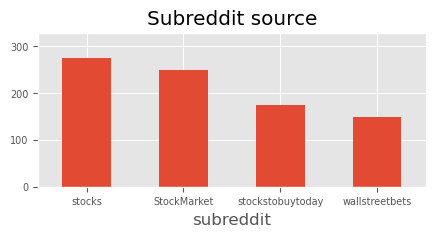

In [68]:
lim = reddit_s1_1.subreddit.value_counts().max() * 1.2
print(reddit_s1_1.subreddit.value_counts())
reddit_s1_1.subreddit.value_counts().plot(kind = 'bar',
                                           title = 'Subreddit source',
                                           ylim = [0, lim], 
                                           rot = 0, fontsize = 7, figsize = (5,2))

In [7]:
Y = reddit_s1_1.sort_values("subreddit", ignore_index= True)

In [8]:
Y.sentiment.value_counts()

sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64

##### Checking if data have missing values (HW4)

In [9]:
Y.isnull().apply(lambda t: dmh.check_missing_values(t))

,subreddit,sentiment,text
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


#### comparing different datas (HW8)

- **We can see that "stockbytoday"is the most positive, and sentiment in "StockMarket" is more averagely composed**

      StockMarket  stocks  stockstobuytoday  wallstreetbets
1.0            96     107               104              60
0.0            82      86                56              59
-1.0           72      81                14              30


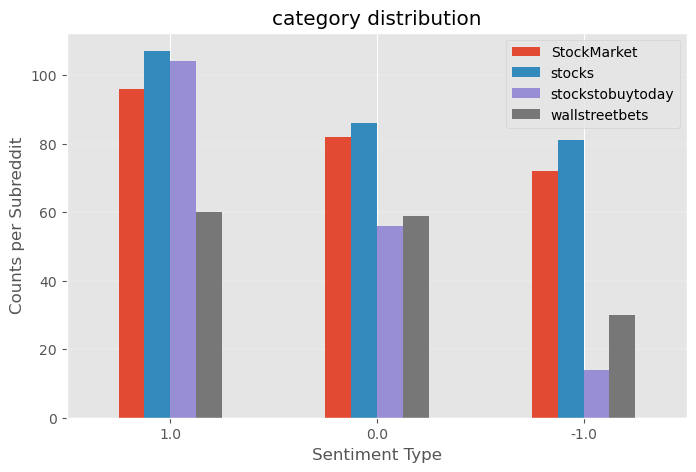

In [ ]:
Ys = pd.DataFrame({'StockMarket': list(Y['sentiment'][0:250].value_counts()), 
                   'stocks': list(Y['sentiment'][250:524].value_counts()),
                   'stockstobuytoday': list(Y['sentiment'][524:698].value_counts()),
                   'wallstreetbets': list(Y['sentiment'][698:].value_counts())
}, index= ['1.0','0.0', '-1.0'])


print(Ys)


plt.style.use('ggplot')
ax = Ys.plot(kind='bar',
         title = 'category distribution',
         rot=0,
         figsize=(8, 5)
         )


ax.grid(axis = 'y', linewidth=0.2)
plt.xlabel('Sentiment Type')
plt.ylabel("Counts per Subreddit")
plt.show()

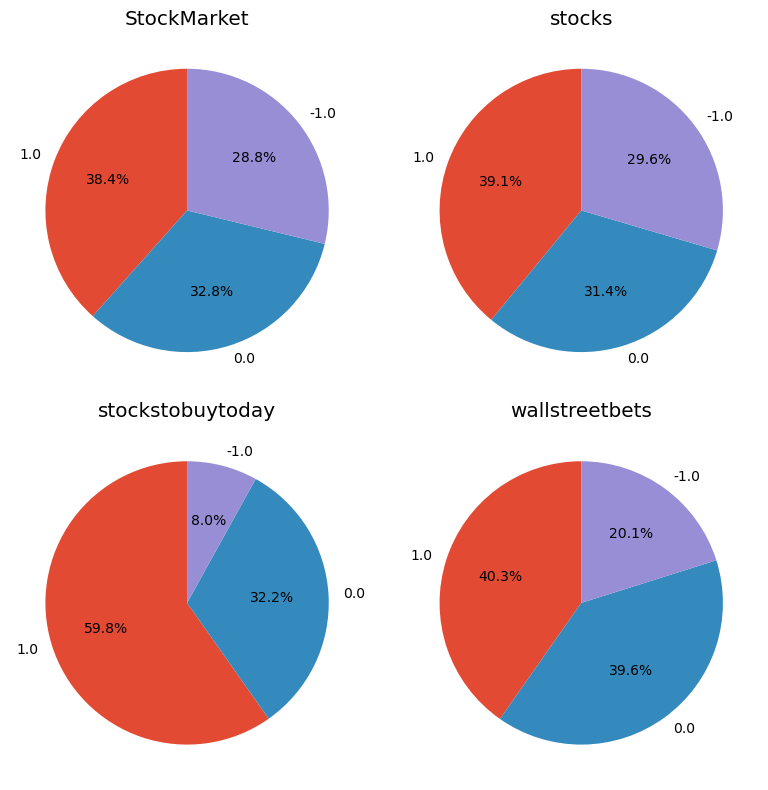

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))  # 2x2 grid

for ax, col in zip(axes.ravel(), Ys.columns):
    Ys[col].plot.pie(
        ax=ax,
        autopct='%1.1f%%',
        startangle=90,
        legend=False,
        ylabel="",          
        title=col
    )

plt.tight_layout()
plt.show()

### Text Anaysis

##### Testing model (HW9)

In [12]:
count_vect = CountVectorizer() # bag of words
Y_counts = count_vect.fit_transform(Y.text) #learn the vocabulary and return document-term matrix
count_vect.get_feature_names_out()

array(['00', '000', '01378', ..., 'zgld', 'zone', 'zsil'],
      shape=(4508,), dtype=object)

In [13]:
analyze = count_vect.build_analyzer()
analyze(Y.text[0])[0:20]

['the',
 'trump',
 'administration',
 'is',
 'begging',
 'xi',
 'jinping',
 'to',
 'call',
 'trump',
 'quickly',
 'trump',
 'signaled',
 'that',
 'he',
 'panicked',
 'at',
 'the',
 'bond',
 'market']

##### Data selection and Visualization (HW11)

In [14]:
term_frequencies = np.asarray(Y_counts.sum(axis=0))[0]
term_frequenciesid = np.argsort(-term_frequencies)
freq = Y_counts.toarray() 
freqsum = np.vstack([freq, term_frequencies])
freqsumsort = freqsum[:, term_frequenciesid]  
freqsumsort 

array([[   2,    3,    2, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   1,    1,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0],
       [1262,  776,  554, ...,    1,    1,    1]], shape=(848, 4508))

##### A slice of unsequenced data (HW13)

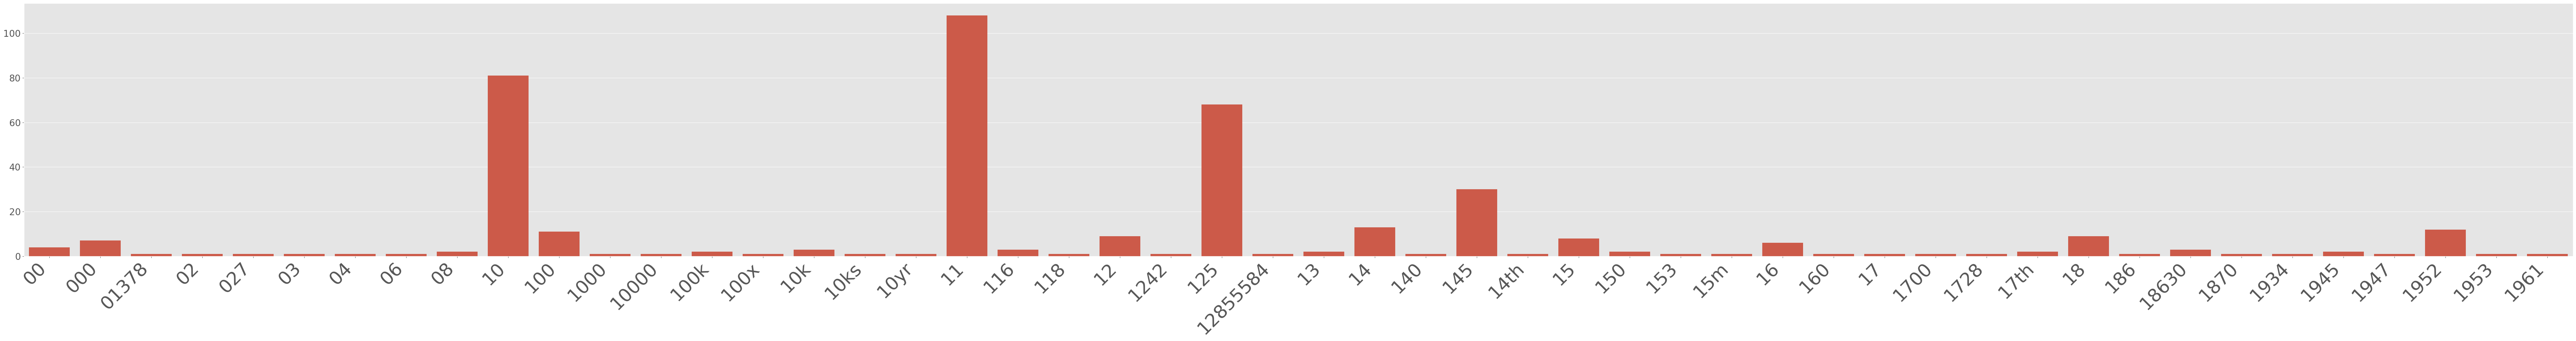

In [15]:
import seaborn as sns

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:50], 
            y=term_frequencies[:50])

plt.xticks(fontsize=40, rotation=45, ha="right") 
plt.yticks(fontsize=20)
plt.show()


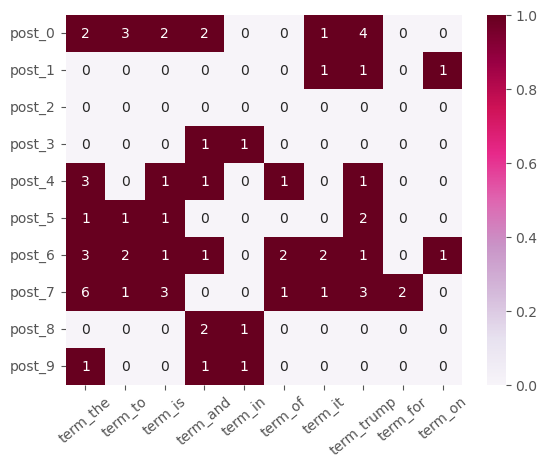

In [28]:
term = ["term_"+str(i) for i in count_vect.get_feature_names_out()[term_frequenciesid][0:10]]
doc = ["post_"+ str(i) for i in list(Y.index[0:10])]

Y1 = pd.DataFrame(freqsumsort[:10, :10], 
                  index=doc,
                  columns=term)

g = sns.heatmap(Y1,cmap="PuRd",
                 vmin=0, vmax=1, annot=True).set_xticklabels(term, rotation = 40)

##### Sequencing the data decreasingly (HW14)

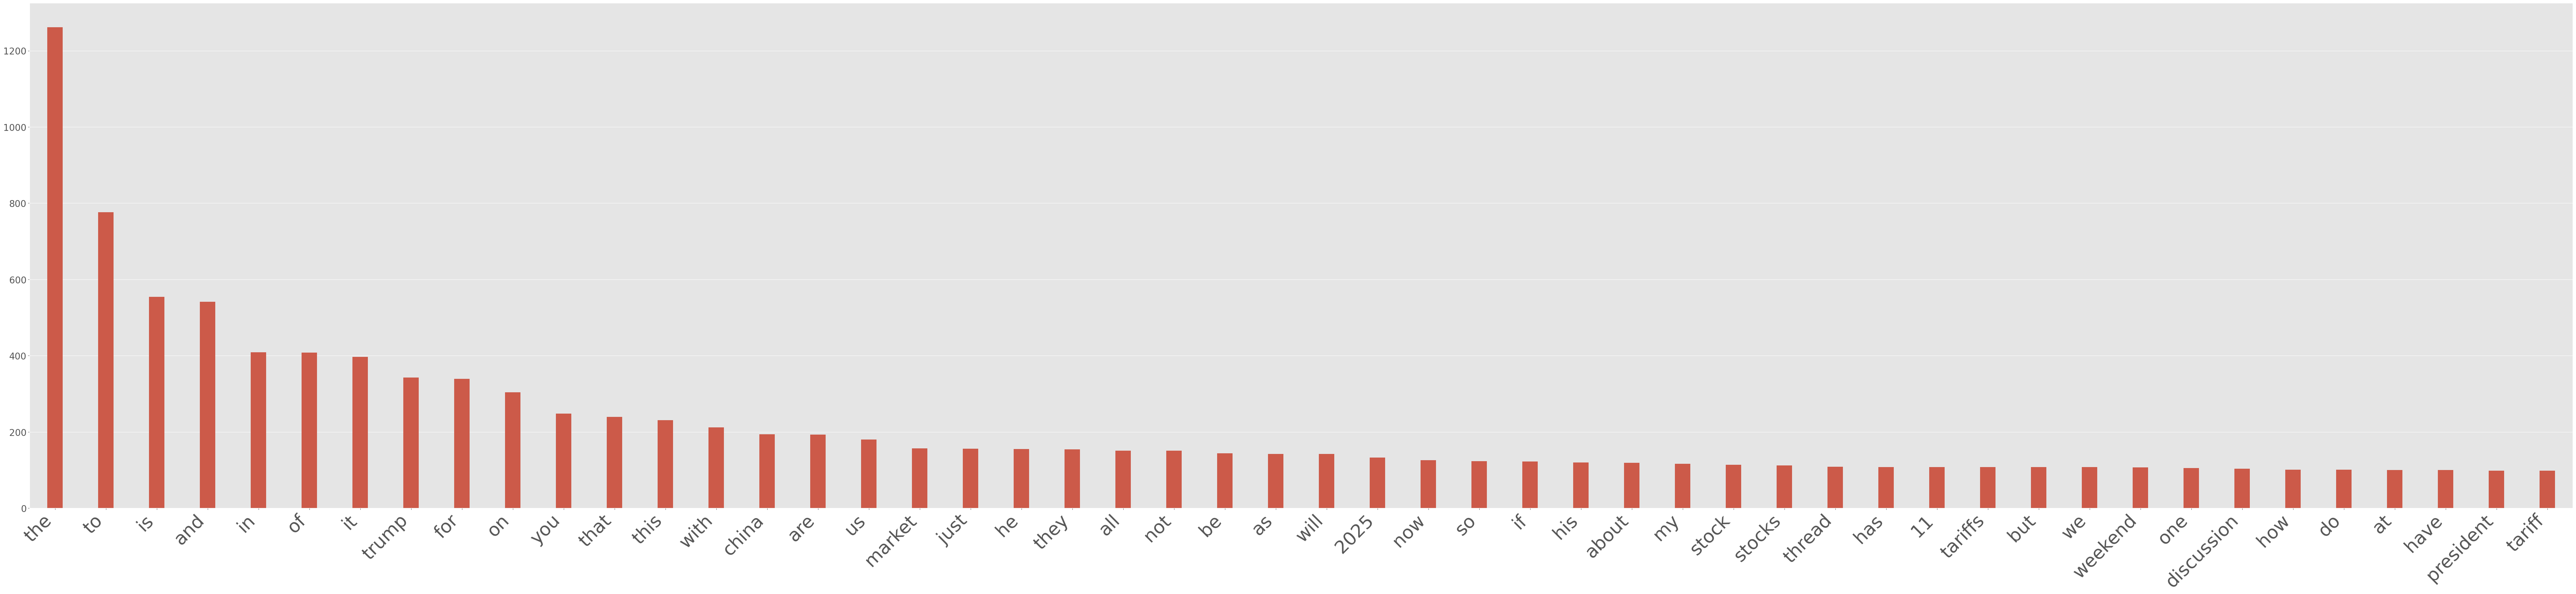

In [30]:
plt.subplots(figsize=(100, 20))
g = sns.barplot(x=count_vect.get_feature_names_out()[term_frequenciesid][:50], 
            y=freqsumsort[-1,:50], 
            width= 0.3,
            capsize= 160)



plt.xticks(fontsize=40, rotation=45, ha="right") 
plt.yticks(fontsize=20)
plt.show()


##### Using plotly to visulize the data(sequenced) (HW12)
- 自訂函數是從stackoverflow找到的


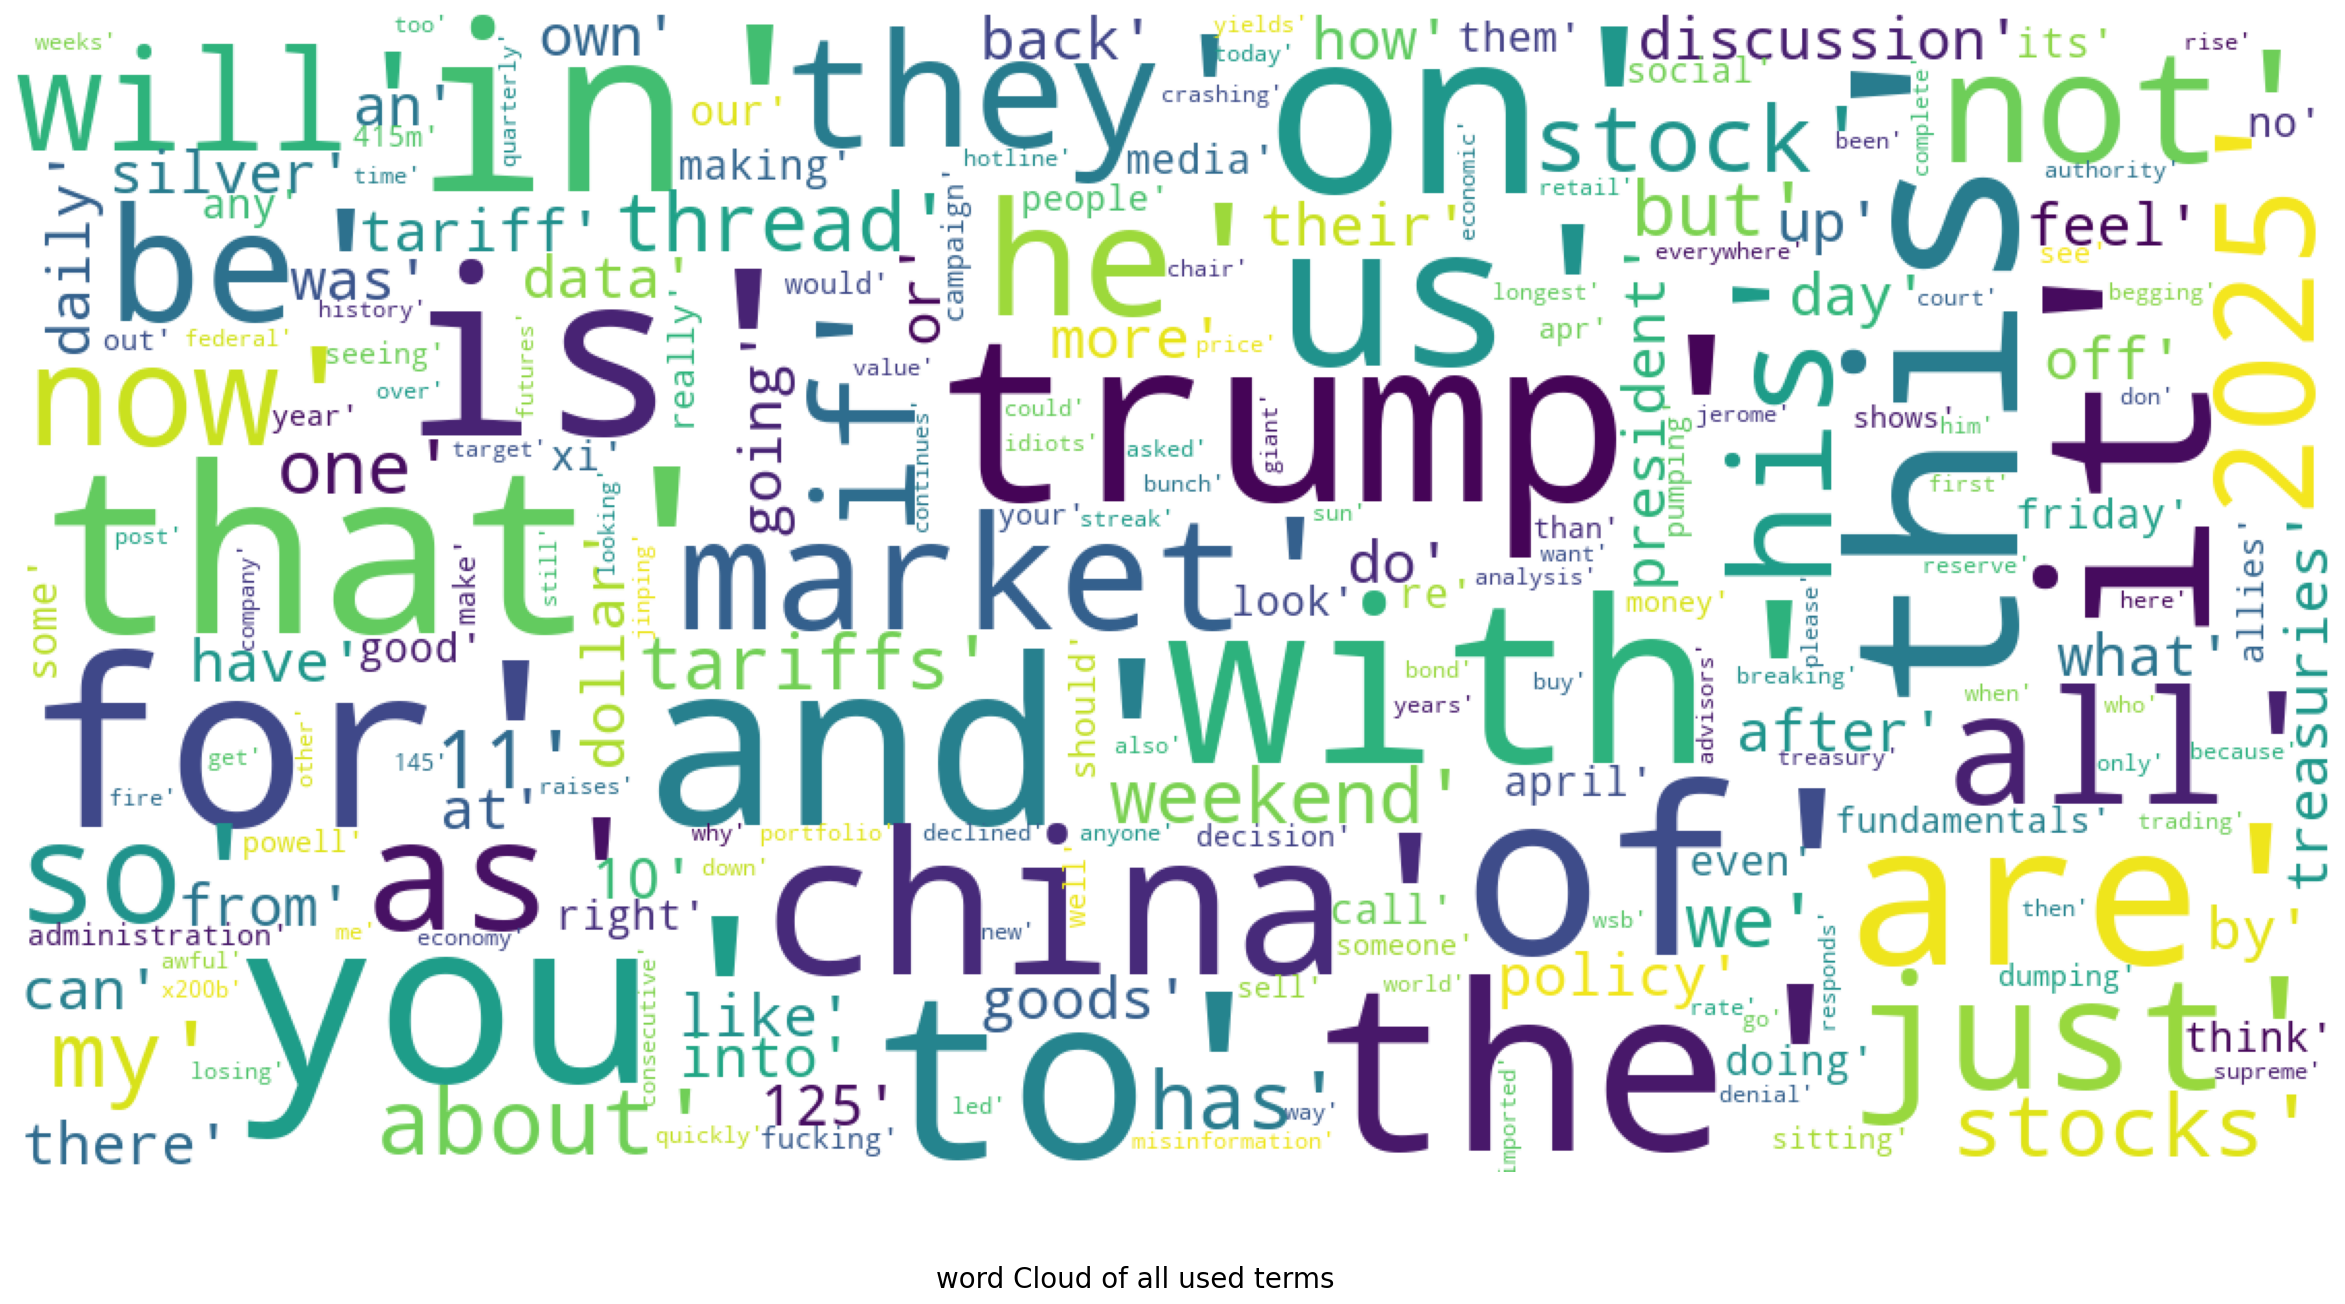

In [62]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

Stopwords=set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords= Stopwords,
        max_words=2000,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(30, 30))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

termdf = pd.DataFrame({"frequency":freqsumsort[-1,:4000], "term":count_vect.get_feature_names_out()[term_frequenciesid][:4000]}) 
termdict = dict(zip(termdf.term,termdf.frequency))
show_wordcloud(termdict, title='word Cloud of all used terms')

##### logrithmic data (HW15)

/var/folders/7s/nxc83svx6bnczl6crz71hrkw0000gn/T/ipykernel_43287/1460939260.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



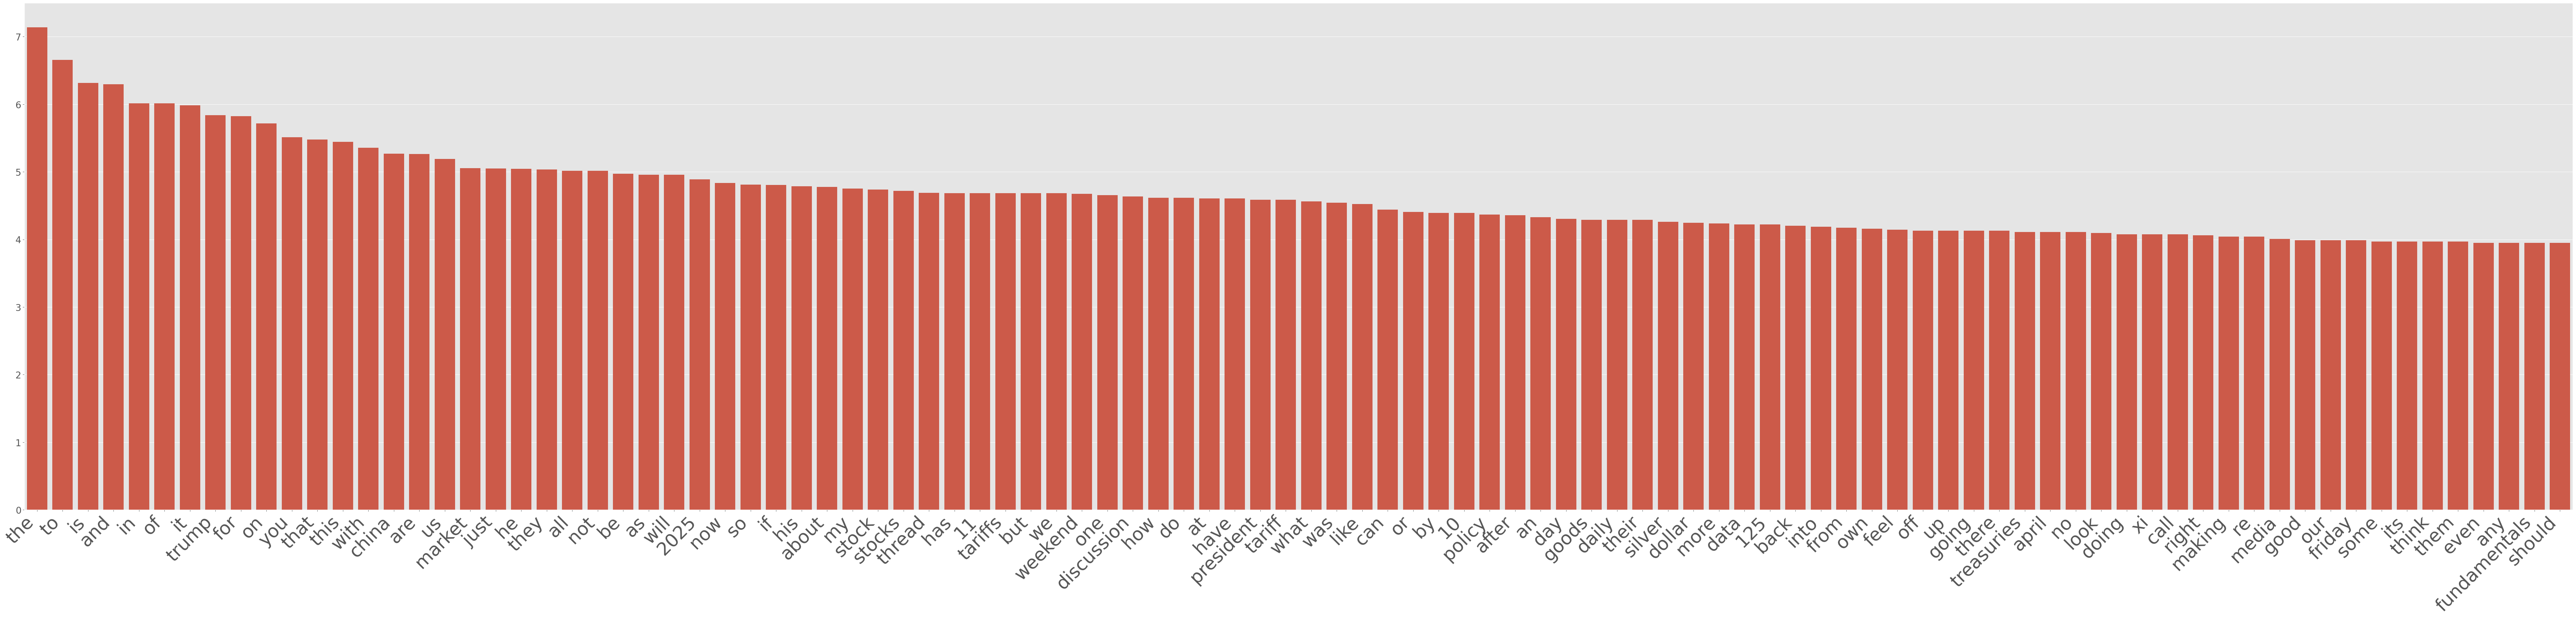

In [20]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 20))
g = sns.barplot(x=count_vect.get_feature_names_out()[term_frequenciesid][:100],
                y=np.asarray(term_frequencies_log)[term_frequenciesid][:100])
g.set_xticklabels(count_vect.get_feature_names_out()[term_frequenciesid][:100], rotation = 90);

plt.xticks(fontsize=40, rotation=45, ha="right") 
plt.yticks(fontsize=20)
plt.show()

# Phase 2

In [21]:
### Begin Assignment Here